<a href="https://colab.research.google.com/github/Thamindu17/google-colab/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost scikit-learn pandas matplotlib seaborn


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving patterned_sample_data.csv to patterned_sample_data.csv


In [ ]:
import pandas as pd

# Paste your synthetic data (or load from CSV if you have 120 weeks version)
data = pd.read_csv("patterned_sample_data.csv")  # or use pd.read_clipboard() if copying table
data.head()
data.tail()


,Weeknumber,TotalActiveTime,Subject,Class,SpecialEventThisWeek,ResourcesUploadedThisWeek
115,116,341.3,Science,7-A,1,6
116,117,304.4,Science,7-A,1,1
117,118,225.6,Science,7-A,0,4
118,119,321.6,Science,7-A,1,3
119,120,210.1,Science,7-A,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop constant columns if needed
data = data.drop(columns=["Subject", "Class"])

# Features & target
X = data.drop("TotalActiveTime", axis=1)
y = data["TotalActiveTime"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_test)


44     240.6
47     215.6
4      198.1
55     378.5
26     246.3
64     255.1
73     299.2
10     249.6
40     231.7
107    329.4
18     249.2
62     312.3
11     334.1
36     205.5
89     248.7
91     286.7
109    199.8
0      222.9
88     315.0
104    344.4
65     260.8
45     248.6
31     247.1
70     305.3
Name: TotalActiveTime, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)#######future v
print(X_test)
print(lr_pred)
# Calculate RMSE by taking the square root of MSE
lr_mse = mean_squared_error(y_test, lr_pred)  # Calculate MSE
lr_rmse = lr_mse**0.5  # Calculate RMSE by taking the square root
print("mse:")
print(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)

     Weeknumber  SpecialEventThisWeek  ResourcesUploadedThisWeek
44           45                     0                          4
47           48                     0                          1
4             5                     0                          1
55           56                     1                          6
26           27                     0                          4
64           65                     0                          6
73           74                     1                          3
10           11                     0                          4
40           41                     0                          3
107         108                     1                          5
18           19                     0                          5
62           63                     1                          4
11           12                     1                          5
36           37                     0                          1
89           90          

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Calculate RMSE manually
rf_mse = mean_squared_error(y_test, rf_pred)  # Calculate MSE first
rf_rmse = rf_mse**0.5  # Then calculate RMSE by taking the square root


rf_r2 = r2_score(y_test, rf_pred)

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = xgb_mse**0.5
xgb_r2 = r2_score(y_test, xgb_pred)


In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [lr_rmse, rf_rmse, xgb_rmse],
    "R² Score": [lr_r2, rf_r2, xgb_r2]
})

print(results)


               Model       RMSE  R² Score
0  Linear Regression  10.488105  0.952797
1      Random Forest  11.253160  0.945659
2            XGBoost  13.165313  0.925623


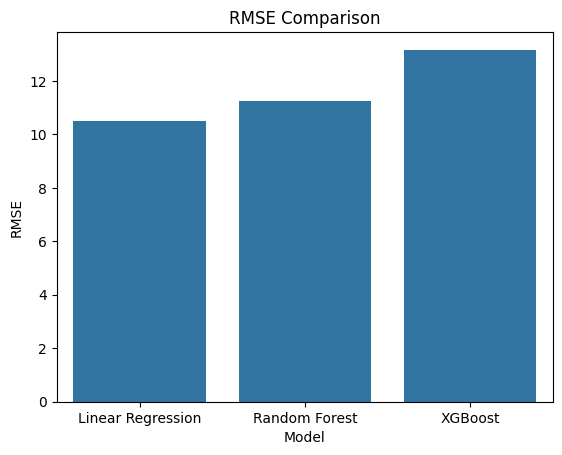

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Model", y="RMSE", data=results)
plt.title("RMSE Comparison")
plt.show()


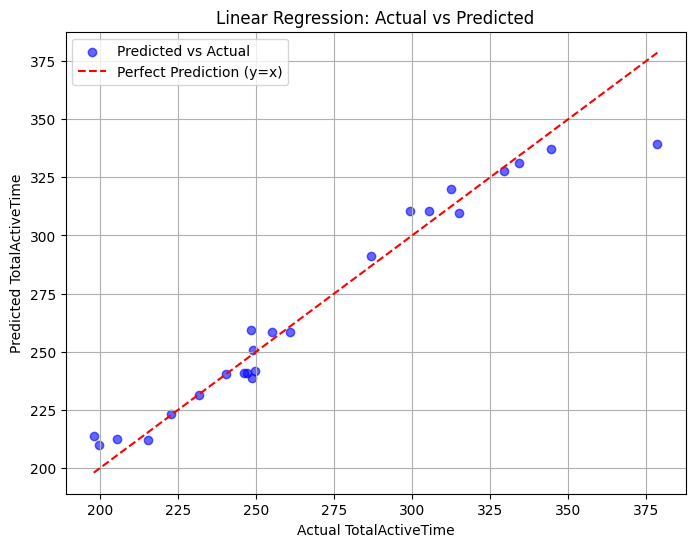

In [ ]:
# Visualize Linear Regression Model
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction (y=x)')
plt.xlabel("Actual TotalActiveTime")
plt.ylabel("Predicted TotalActiveTime")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

X = data.drop(columns=["TotalActiveTime"])
y = data["TotalActiveTime"]

lr = LinearRegression()
lr.fit(X, y)


LinearRegression()

# Input values manually

In [ ]:
# Assumed future input values (you can change)
future = pd.DataFrame({
    "Weeknumber": [121, 122, 123],
    "SpecialEventThisWeek": [1, 0, 1],
    "ResourcesUploadedThisWeek": [3, 2, 4]
})

future_preds = lr.predict(future)
print(future_preds)


[308.69418855 219.01440766 317.98689725]


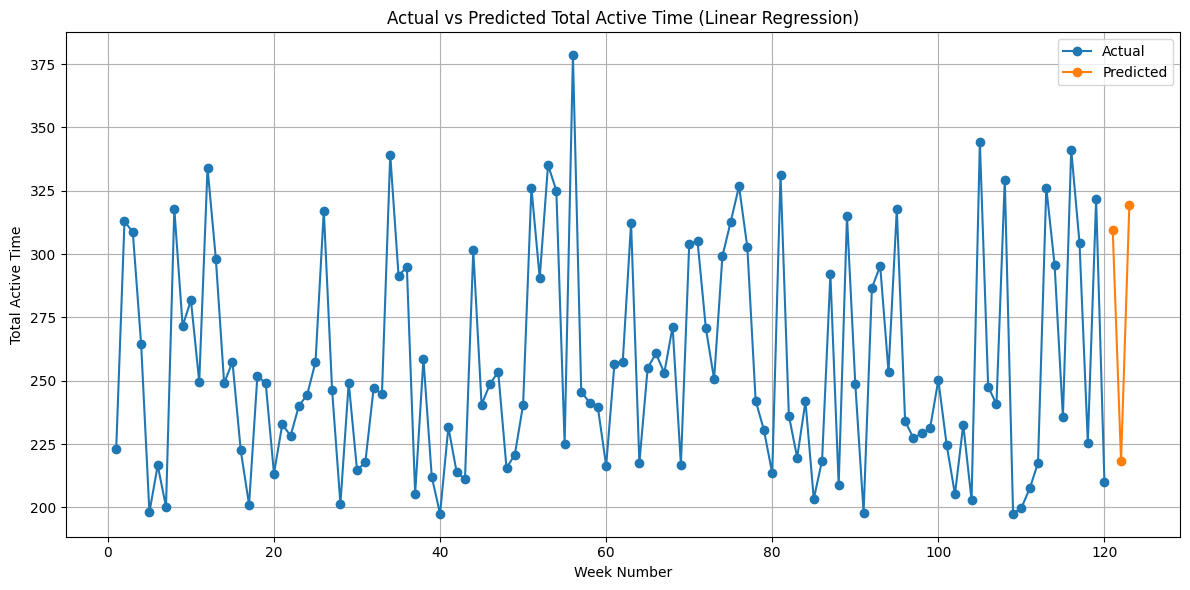

In [ ]:
import matplotlib.pyplot as plt

# Combine actual and predicted data
actual = data[["Weeknumber", "TotalActiveTime"]].copy()
actual["Type"] = "Actual"

predicted = future.copy()
predicted["TotalActiveTime"] = future_preds
predicted["Type"] = "Predicted"

combined = pd.concat([actual, predicted])

# Plot
plt.figure(figsize=(12, 6))
for label, df in combined.groupby("Type"):
    plt.plot(df["Weeknumber"], df["TotalActiveTime"], marker='o', label=label)

plt.xlabel("Week Number")
plt.ylabel("Total Active Time")
plt.title("Actual vs Predicted Total Active Time (Linear Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# predict future feateres


In [ ]:
# Fill future feature values using recent trends
special_event_avg = data["SpecialEventThisWeek"].rolling(3).mean().iloc[-1].round()
resources_avg = int(data["ResourcesUploadedThisWeek"].rolling(3).mean().iloc[-1].round())

# Use those values for future weeks
future = pd.DataFrame({
    "Weeknumber": [121, 122, 123],
    "SpecialEventThisWeek": [1,0,1],
    "ResourcesUploadedThisWeek":  [3, 2, 4]
})


In [ ]:
future_preds = lr.predict(future)


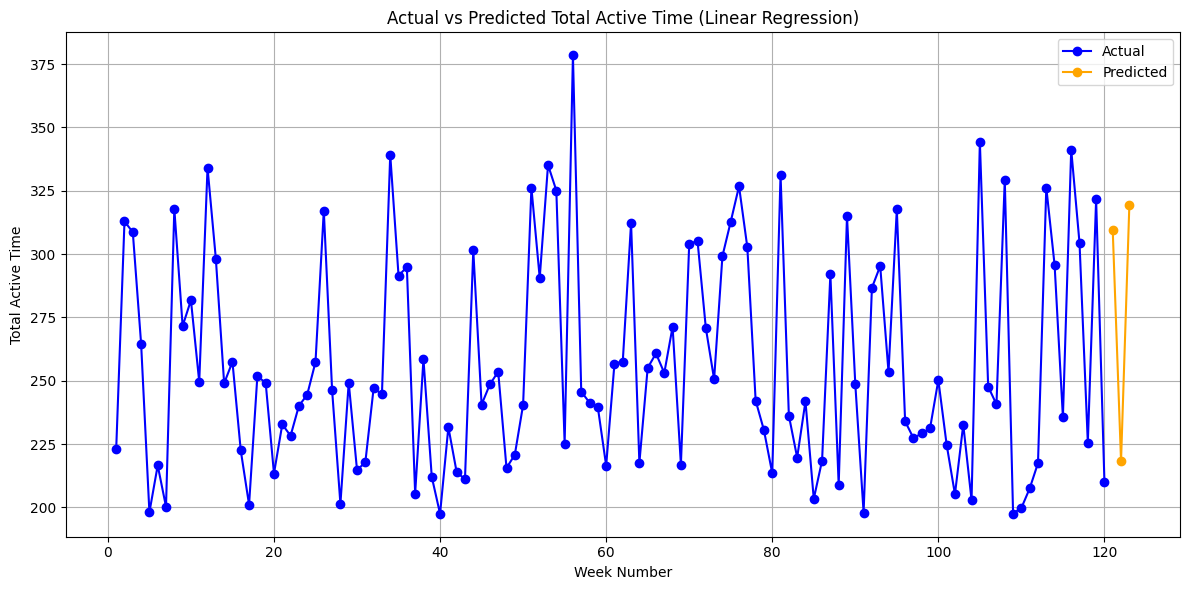

In [ ]:
import matplotlib.pyplot as plt

# Combine actual and predicted data
actual = data[["Weeknumber", "TotalActiveTime"]].copy()
actual["Type"] = "Actual"

predicted = future.copy()
predicted["TotalActiveTime"] = future_preds
predicted["Type"] = "Predicted"

combined = pd.concat([actual, predicted], ignore_index=True)

# ✅ Sort by Weeknumber
combined = combined.sort_values("Weeknumber")

# Plot
plt.figure(figsize=(12, 6))

# Plot actual
actual_data = combined[combined["Type"] == "Actual"]
plt.plot(actual_data["Weeknumber"], actual_data["TotalActiveTime"], marker='o', label="Actual", color='blue')

# Plot predicted
predicted_data = combined[combined["Type"] == "Predicted"]
plt.plot(predicted_data["Weeknumber"], predicted_data["TotalActiveTime"], marker='o', label="Predicted", color='orange')

# Labels and grid
plt.xlabel("Week Number")
plt.ylabel("Total Active Time")
plt.title("Actual vs Predicted Total Active Time (Linear Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
